In [42]:
import pandas as pd
import numpy as np
df=pd.read_csv ('Running log.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

In [43]:
#Removing last 18 rows of data (from previous user of the watch)
df = df.iloc[:-18]

In [44]:
#Selecting the columns we need
columns_to_keep = ['Activity Type', 'Date', 'Title', 'Distance', 'Time', 'Avg HR', 'Avg Pace', 'Total Ascent']
df_cleaned = df[columns_to_keep]

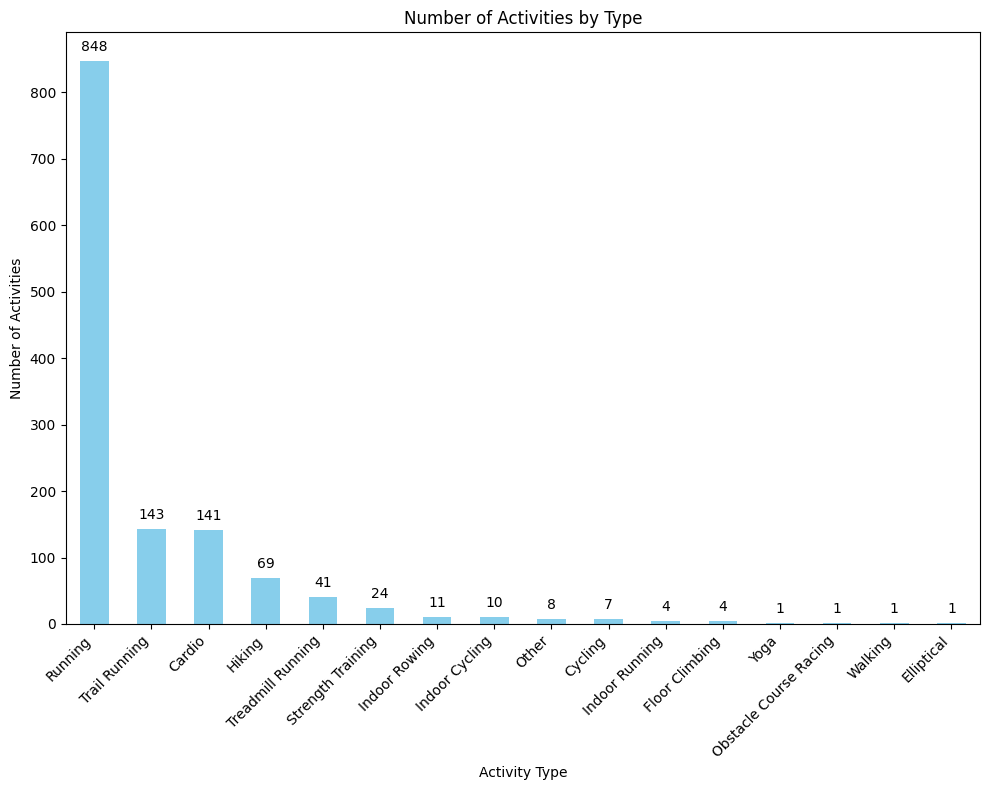

In [45]:
activity_counts = df_cleaned['Activity Type'].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

ax = activity_counts.plot(kind='bar', color='skyblue')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of Activities by Type')
plt.xlabel('Activity Type')
plt.ylabel('Number of Activities')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


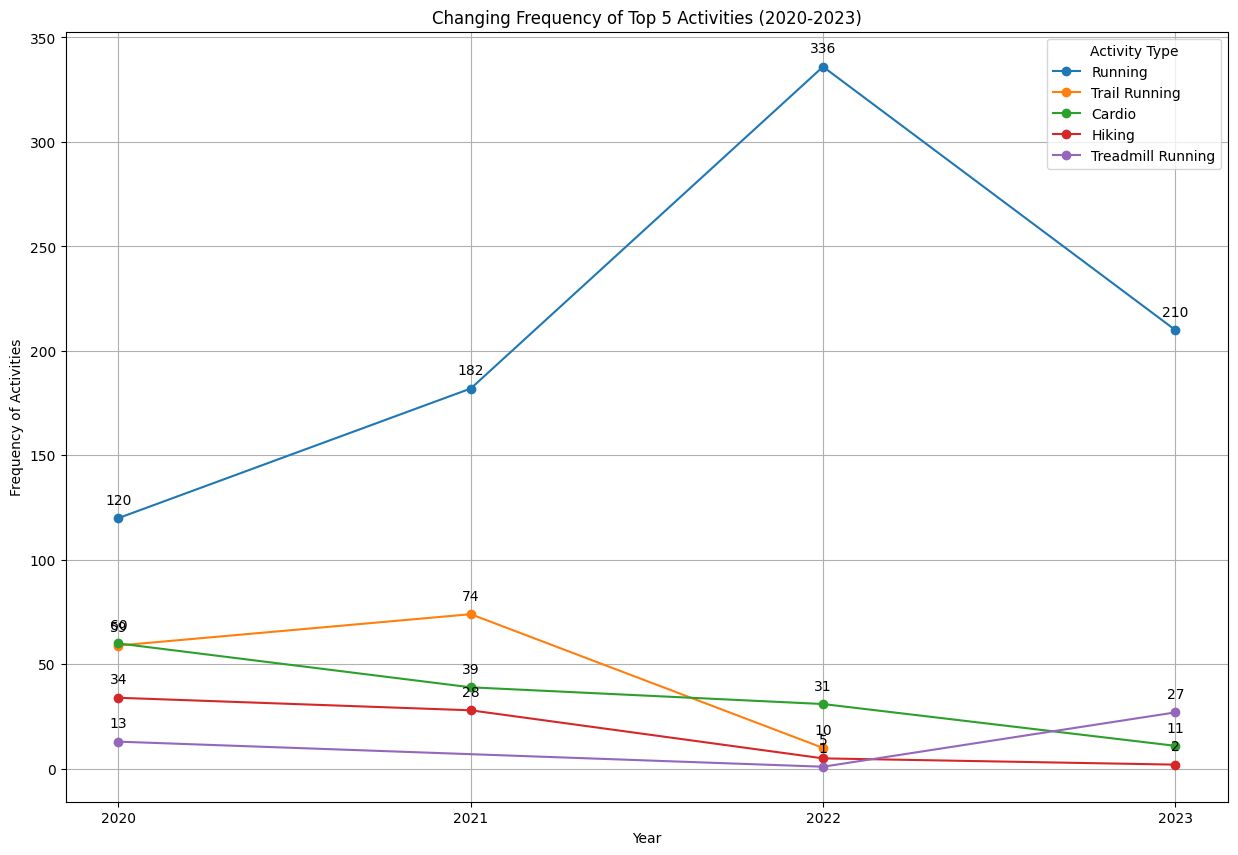

In [46]:
# Line graph to show frequency of top-5 activities over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Plotting each activity type
for activity_type in top_activities:
    subset = activity_year_count_top[activity_year_count_top['Activity Type'] == activity_type]
    plt.plot(subset['Year'], subset['Count'], marker='o', label=activity_type)
    
    # Annotate each point with the count value
    for i, row in subset.iterrows():
        plt.annotate(str(row['Count']), (row['Year'], row['Count']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Changing Frequency of Top 5 Activities (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Frequency of Activities')
plt.xticks([2020, 2021, 2022, 2023])
plt.legend(title='Activity Type')
plt.grid(True)

plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_19064\1213881010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = pd.to_datetime(df_cleaned['Date']).dt.year


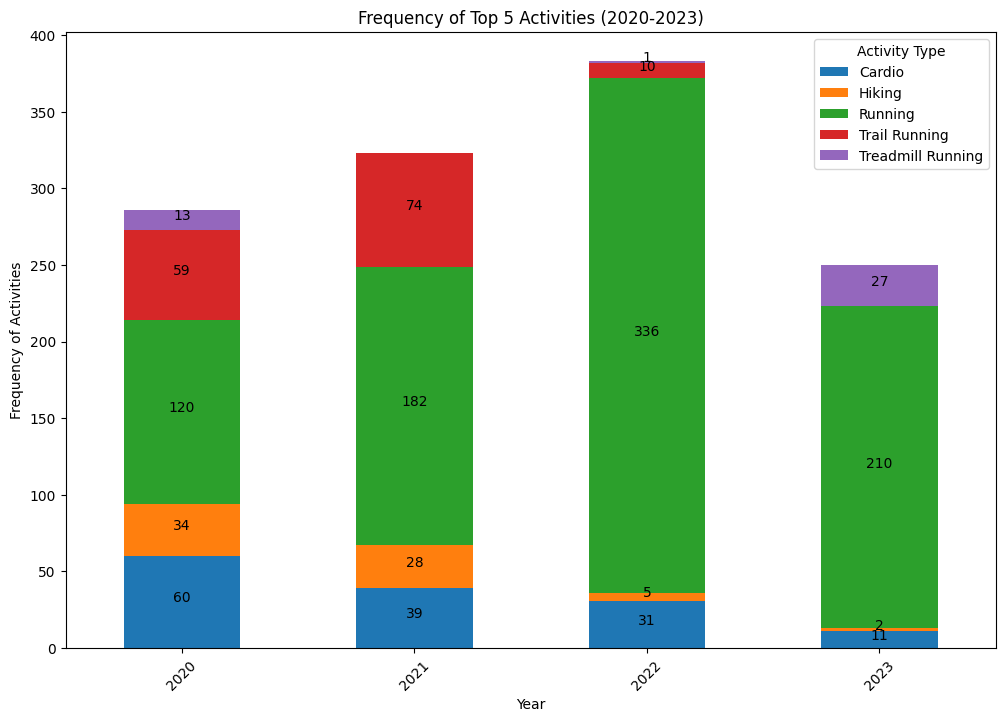

In [47]:
# A stacked bar chart to show frequency of top-5 activities over the years
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Date']).dt.year

df_filtered = df_cleaned[df_cleaned['Year'].isin([2020, 2021, 2022, 2023])]

top_activities = df_filtered['Activity Type'].value_counts().nlargest(5).index

df_top_activities = df_filtered[df_filtered['Activity Type'].isin(top_activities)]

activity_year_count_top = df_top_activities.groupby(['Year', 'Activity Type']).size().reset_index(name='Count')

activity_pivot = activity_year_count_top.pivot(index='Year', columns='Activity Type', values='Count').fillna(0)

ax = activity_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding annotations for each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:  
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center')

plt.title('Frequency of Top 5 Activities (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Frequency of Activities')
plt.xticks(rotation=45)

plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_19064\2332540261.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_running['Avg Pace Numeric Miles'] = df_running['Avg Pace'].apply(convert_pace_to_minutes_per_mile)


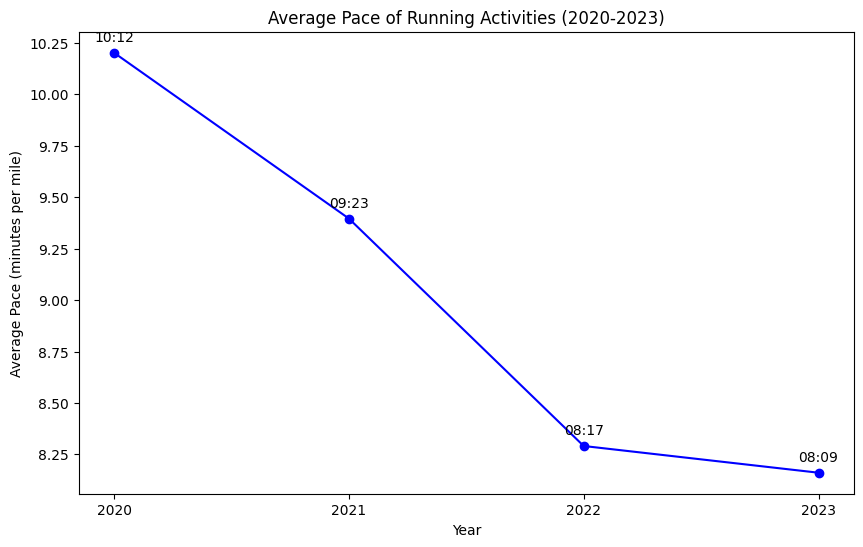

In [48]:
# A gpraph to show changes in average pace for Running activities over the past years in minutes/mile
import matplotlib.pyplot as plt

df_running = df_cleaned[df_cleaned['Activity Type'] == 'Running']

# Function to convert 'mm:ss' to minutes per kilometer, then to minutes per mile
def convert_pace_to_minutes_per_mile(pace_str):
    try:
        minutes, seconds = map(int, pace_str.split(':'))
        pace_per_km = minutes + seconds / 60
        pace_per_mile = pace_per_km * 1.60934 
        return pace_per_mile
    except:
        return None

# Function to convert minutes to 'mm:ss' format
def convert_minutes_to_mm_ss(minutes):
    total_seconds = int(minutes * 60)
    mm = total_seconds // 60
    ss = total_seconds % 60
    return f"{mm:02d}:{ss:02d}"

df_running['Avg Pace Numeric Miles'] = df_running['Avg Pace'].apply(convert_pace_to_minutes_per_mile)

average_pace_per_year_miles = df_running.groupby('Year')['Avg Pace Numeric Miles'].mean()

# Convert average pace from minutes to 'mm:ss' format
average_pace_per_year_miles_formatted = average_pace_per_year_miles.apply(convert_minutes_to_mm_ss)

plt.figure(figsize=(10, 6))
line_plot = average_pace_per_year_miles.plot(kind='line', marker='o', color='blue')

# Adding the values of the average pace on the graph with an offset to avoid overlap with the line
offset = (average_pace_per_year_miles.max() - average_pace_per_year_miles.min()) * 0.02  # offset as 2% of range
for x, y in zip(average_pace_per_year_miles.index, average_pace_per_year_miles):
    formatted_pace = convert_minutes_to_mm_ss(y)
    plt.text(x, y + offset, formatted_pace, fontsize=10, verticalalignment='bottom', horizontalalignment='center', color='black')

plt.title('Average Pace of Running Activities (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Pace (minutes per mile)')
plt.xticks([2020, 2021, 2022, 2023])

plt.show()


C:\Users\samar\AppData\Local\Temp\ipykernel_19064\3994571438.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_running['Avg Pace Numeric'] = df_running['Avg Pace'].apply(convert_pace_to_minutes)


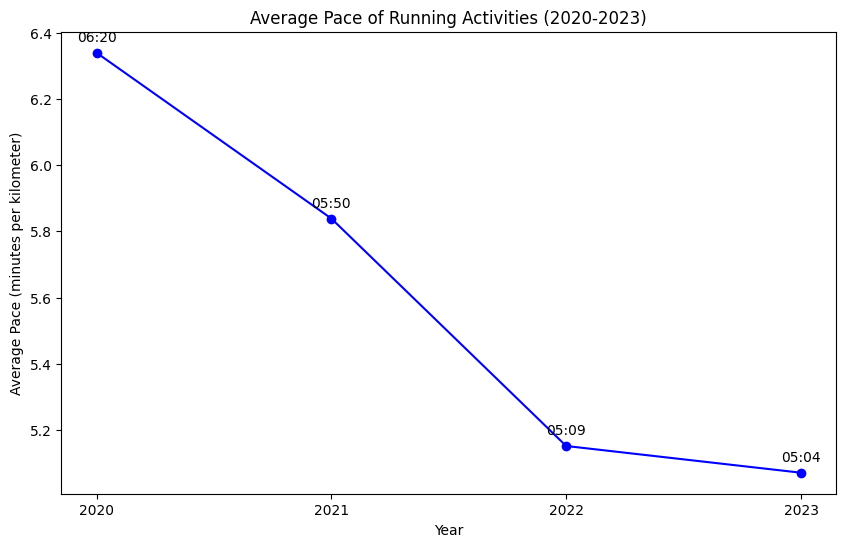

In [49]:
# A gpraph to show changes in average pace for Running activities over the past years in minutes/km

# Convert pace to minutes
def convert_pace_to_minutes(pace_str):
    try:
        minutes, seconds = map(int, pace_str.split(':'))
        return minutes + seconds / 60
    except:
        return None

# Convert minutes to 'mm:ss' format
def convert_minutes_to_mm_ss(minutes):
    total_seconds = int(minutes * 60)
    mm = total_seconds // 60
    ss = total_seconds % 60
    return f"{mm:02d}:{ss:02d}"
    
df_running['Avg Pace Numeric'] = df_running['Avg Pace'].apply(convert_pace_to_minutes)

average_pace_per_year = df_running.groupby('Year')['Avg Pace Numeric'].mean()

average_pace_per_year_formatted = average_pace_per_year.apply(convert_minutes_to_mm_ss)

plt.figure(figsize=(10, 6))
line_plot = average_pace_per_year.plot(kind='line', marker='o', color='blue')

# Adding the values of the average pace on the graph
offset = (average_pace_per_year.max() - average_pace_per_year.min()) * 0.02  
for x, y in average_pace_per_year.items():
    formatted_pace = convert_minutes_to_mm_ss(y)
    plt.text(x, y + offset, formatted_pace, fontsize=10, verticalalignment='bottom', horizontalalignment='center', color='black')

plt.title('Average Pace of Running Activities (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Pace (minutes per kilometer)')
plt.xticks([2020, 2021, 2022, 2023])

plt.show()

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convert 'Total Ascent' to numeric, handling any non-numeric strings
df_cleaned['Total Ascent'] = pd.to_numeric(df_cleaned['Total Ascent'].astype(str).str.replace(',', ''), errors='coerce')
# Using only Running activities of <100 m ascent to exclude trail running for training
df_running = df_cleaned[(df_cleaned['Activity Type'] == 'Running') & (df_cleaned['Total Ascent'] < 100)]

# Convert 'Time' to total seconds for duration
df_running['Total Seconds'] = pd.to_timedelta(df_running['Time']).dt.total_seconds()

# Dropping rows with missing values
df_running_clean = df_running.dropna(subset=['Distance', 'Total Ascent', 'Total Seconds'])

# Features and target
features = ['Distance', 'Total Ascent']
target = 'Total Seconds'

# Splitting the data
X = df_running_clean[features]
y = df_running_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R-squared:', r2)




C:\Users\samar\AppData\Local\Temp\ipykernel_19064\2394919631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Ascent'] = pd.to_numeric(df_cleaned['Total Ascent'].astype(str).str.replace(',', ''), errors='coerce')
C:\Users\samar\AppData\Local\Temp\ipykernel_19064\2394919631.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_running['Total Seconds'] = pd.to_timedelta(df_running['Time']).dt.total_seconds()


RMSE: 300.9719465459324
R-squared: 0.9666280674263352


In [56]:
# Hypothetical data for a 25km run with 50 meters total ascent
hypothetical_data = {
    'Distance': [25],  # 25 kilometers
    'Total Ascent': [50]  # 50 meters of total ascent
}

# Creating a DataFrame from the hypothetical data
df_predict = pd.DataFrame(hypothetical_data)

# Predicting the total time in seconds using the model
predicted_total_seconds = model.predict(df_predict)[0]

# Calculating average pace in minutes per kilometer
predicted_avg_pace_minutes = predicted_total_seconds / 60 / df_predict['Distance'][0]

def convert_minutes_to_mm_ss(minutes):
    total_seconds = int(minutes * 60)
    mm = total_seconds // 60
    ss = total_seconds % 60
    return f"{mm:02d}:{ss:02d}"

predicted_avg_pace_mm_ss = convert_minutes_to_mm_ss(predicted_avg_pace_minutes)

print("Predicted Average Pace (mm:ss per kilometer):", predicted_avg_pace_mm_ss)

Predicted Average Pace (mm:ss per kilometer): 04:20


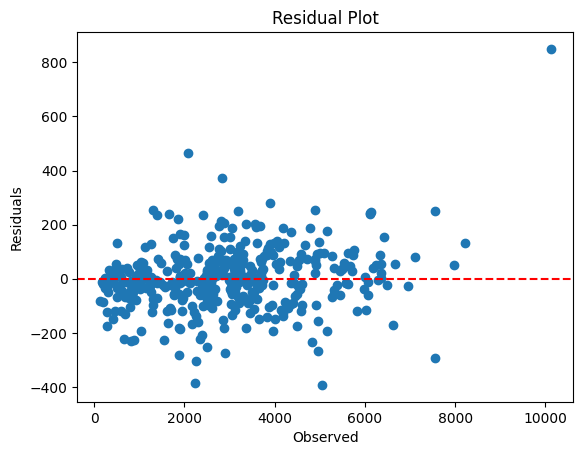

In [57]:
import matplotlib.pyplot as plt

# Predict on training set
train_predictions = model.predict(X_train)

# Calculate residuals
residuals = y_train - train_predictions

# Plot residuals
plt.scatter(y_train, residuals)
plt.title('Residual Plot')
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [71]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())


Scores: [252.04769818 268.62487248 341.24996552 252.19418952 433.3891864 ]
Mean: 309.501182419448
Standard deviation: 70.15994549366195


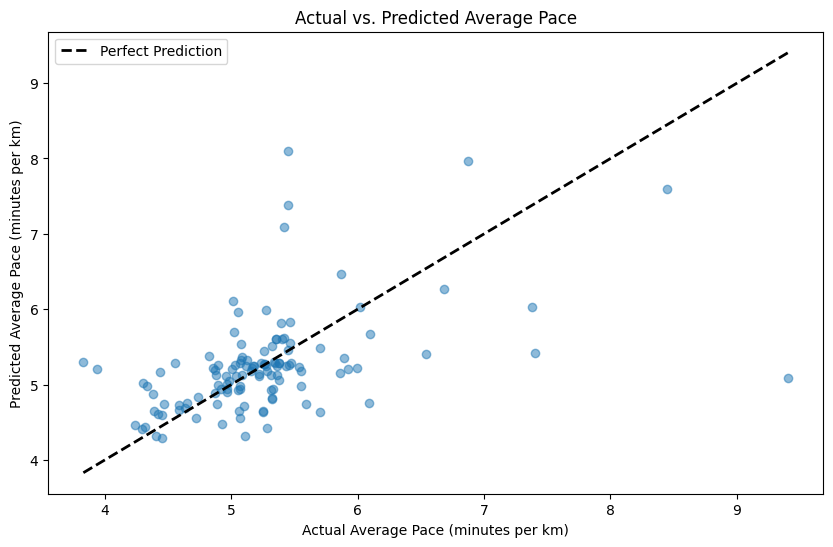

In [61]:
import matplotlib.pyplot as plt

# Convert 'Distance' to numeric if it's not already
X_test['Distance'] = pd.to_numeric(X_test['Distance'], errors='coerce')

# Calculate the actual avg pace (in seconds per km)
actual_avg_pace = y_test / X_test['Distance']

# Predict the total seconds using the model for the test set
predicted_total_seconds = model.predict(X_test)

# Calculate the predicted avg pace (in seconds per km)
predicted_avg_pace = predicted_total_seconds / X_test['Distance']

# Convert avg pace from seconds per km to minutes per km for both actual and predicted
actual_avg_pace_min = actual_avg_pace / 60
predicted_avg_pace_min = predicted_avg_pace / 60

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_avg_pace_min, predicted_avg_pace_min, alpha=0.5)

# Plot a line representing perfect predictions
max_val = max(actual_avg_pace_min.max(), predicted_avg_pace_min.max())
min_val = min(actual_avg_pace_min.min(), predicted_avg_pace_min.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')

# Label the axes and the plot
plt.xlabel('Actual Average Pace (minutes per km)')
plt.ylabel('Predicted Average Pace (minutes per km)')
plt.title('Actual vs. Predicted Average Pace')
plt.legend()
plt.show()
